## Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objects as go

In [2]:
# Load dataset
data_df = pd.read_excel("TG-A-Ejemplo Transaformed.xlsx") 
data = pd.read_excel("TG-A-Ejemplo Transaformed.xlsx") 


In [3]:
# Set DateTime as the index for both dataframes
for df in [data_df, data]:
    df.set_index('DateTime', inplace=True)

# Dropping the 'Central-Turbina' column in both dataframes
data_df = data_df.drop(columns='Central-Turbina')
data = data.drop(columns='Central-Turbina')

# Changing the data type of the columns in 'data_df'
numeric_columns = data_df.columns[:]
data_df[numeric_columns] = data_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define a mapping from old column names to new column names
column_mapping = {
    'Ua TEN L1-L2': 'Ua',
    'Ub TEN L2-L3': 'Ub',
    'Uc TEN. L3-L1': 'Uc',
    'Ia CORR L1': 'Ia',
    'Ib CORR L2': 'Ib',
    'Ic CORR L3': 'Ic'
}

# Renaming the columns in 'data_df'
data_df = data_df.rename(columns=column_mapping)


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82020 entries, 2012-01-10 09:00:00 to 2021-12-19 23:59:00
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Active Power        81963 non-null  float64
 1   Reactive Power      81966 non-null  float64
 2   Excitation Current  81962 non-null  float64
 3   Excitation Voltage  81962 non-null  float64
 4   Ua                  81964 non-null  float64
 5   Ub                  81964 non-null  float64
 6   Uc                  81964 non-null  float64
 7   Ia                  81965 non-null  float64
 8   Ib                  81965 non-null  float64
 9   Ic                  81964 non-null  float64
dtypes: float64(10)
memory usage: 6.9 MB


In [5]:
# Check if there is any missing data
missing_data = data_df.isnull().sum()
if missing_data.sum() == 0:
    print("There is no missing data.")
else:
    print("Missing data exists in the following columns:", missing_data[missing_data != 0].index)


Missing data exists in the following columns: Index(['Active Power', 'Reactive Power', 'Excitation Current',
       'Excitation Voltage', 'Ua', 'Ub', 'Uc', 'Ia', 'Ib', 'Ic'],
      dtype='object')


**Plotting the Time Series for some all the variables before doing any transformations on the data.**

- Each subplot is interactive and independent of the others. 
- This allows you to zoom in and out on one plot without affecting the others

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ua'],
                name="Ua",
                line_color='deepskyblue',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ub'],
                name="Ub",
                line_color='dimgray',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Uc'],
                name="Uc",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ua, Ub, and Uc")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ia'],
                name="Ia",
                line_color='darkred',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ib'],
                name="Ib",
                line_color='purple',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ic'],
                name="Ic",
                line_color='orange',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ia, Ib, and Ic")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Active Power'],
                name="Active Power",
                line_color='yellow',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Reactive Power'],
                name="Reactive Power",
                line_color='lightgreen',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Active Power and Reactive Power")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Voltage'],
                name="Excitation Voltage",
                line_color='pink',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Current'],
                name="Excitation Current",
                line_color='cyan',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Excitation Voltage and Exitation Current")
fig.show()


In [10]:
# Replacing zero values with NaN and drop all rows with NaN values
data_df.replace(0, np.nan, inplace=True)
data_df.dropna(inplace=True)


**Plotting the Time Series for all the original variables after dropping all 0 values and NaN's.**

- Each subplot is interactive and independent of the others. 
- This allows you to zoom in and out on one plot without affecting the others

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ua'],
                name="Ua",
                line_color='deepskyblue',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ub'],
                name="Ub",
                line_color='dimgray',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Uc'],
                name="Uc",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ua, Ub, and Uc")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ia'],
                name="Ia",
                line_color='darkred',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ib'],
                name="Ib",
                line_color='purple',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Ic'],
                name="Ic",
                line_color='orange',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Ia, Ib, and Ic")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Active Power'],
                name="Active Power",
                line_color='yellow',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Reactive Power'],
                name="Reactive Power",
                line_color='lightgreen',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Active Power and Reactive Power")
fig.show()

In [ ]:
# Create subplots: 10 rows
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Voltage'],
                name="Excitation Voltage",
                line_color='pink',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Excitation Current'],
                name="Excitation Current",
                line_color='cyan',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Stacked Subplots for Excitation Voltage and Exitation Current")
fig.show()


In [15]:
# Computing differences between different currents
data_df['Diff Ia-Ib'] = data_df['Ia'] - data_df['Ib']
data_df['Diff Ib-Ic'] = data_df['Ib'] - data_df['Ic']
data_df['Diff Ic-Ia'] = data_df['Ic'] - data_df['Ia']

# Creating the Apparent power column
data_df['Apparent Power'] = np.sqrt(data_df['Active Power']**2 + data_df['Reactive Power']**2)

# Creating the 'k' factor column
data_df['k'] = data_df['Active Power']/data_df['Apparent Power']

# Compute RMS current and voltage
data_df['I RMS'] = np.sqrt((data_df['Ia']**2 + data_df['Ib']**2 + data_df['Ic']**2) / 3)
data_df['U RMS'] = np.sqrt((data_df['Ua']**2 + data_df['Ub']**2 + data_df['Uc']**2) / 3)

# Compute Line-to-Line voltage RMS and current RMS
data_df['Line Voltage RMS'] = np.sqrt(3) * data_df['U RMS']
data_df['Line Current RMS'] = data_df['I RMS']  # In a balanced system, line current = phase current


**Plotting the Time Series for the new variables we created.** 

- This plots are done after the 0's and the NaN's are dropped.
- Each subplot is interactive and independent of the others. 
- This allows you to zoom in and out on one plot without affecting the others

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Diff Ia-Ib'],
                name="Diff Ia-Ib",
                line_color='deepskyblue',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Diff Ib-Ic'],
                name="Diff Ib-Ic",
                line_color='dimgray',
                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Diff Ic-Ia'],
                name="Diff Ic-Ia",
                line_color='darkgreen',
                opacity=0.8), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Current Differences")
fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Apparent Power'],
                name="Apparent Power",
                line_color='darkred',
                opacity=0.8))

fig.update_layout(height=400, width=800, title_text="Apparent Power")
fig.show()


In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x=data_df.index,
                y=data_df['k'],
                name="k factor",
                line_color='purple',
                opacity=0.8))

fig.update_layout(height=400, width=800, title_text="k Factor")
fig.show()


In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['I RMS'],
                name="I RMS",
                line_color='orange',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['U RMS'],
                name="U RMS",
                line_color='pink',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="RMS Current and Voltage")
fig.show()


In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Line Voltage RMS'],
                name="Line Voltage RMS",
                line_color='cyan',
                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
                x=data_df.index,
                y=data_df['Line Current RMS'],
                name="Line Current RMS",
                line_color='yellow',
                opacity=0.8), row=2, col=1)

fig.update_layout(height=800, width=800, title_text="Line-to-Line RMS Voltage and Current")
fig.show()


**Correlations with the Exitation Current**

In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81960 entries, 2012-01-10 09:00:00 to 2021-12-19 23:59:00
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Active Power        81960 non-null  float64
 1   Reactive Power      81960 non-null  float64
 2   Excitation Current  81960 non-null  float64
 3   Excitation Voltage  81960 non-null  float64
 4   Ua                  81960 non-null  float64
 5   Ub                  81960 non-null  float64
 6   Uc                  81960 non-null  float64
 7   Ia                  81960 non-null  float64
 8   Ib                  81960 non-null  float64
 9   Ic                  81960 non-null  float64
 10  Diff Ia-Ib          81960 non-null  float64
 11  Diff Ib-Ic          81960 non-null  float64
 12  Diff Ic-Ia          81960 non-null  float64
 13  Apparent Power      81960 non-null  float64
 14  k                   81960 non-null  float64
 15  I RMS             

In [22]:
# Calculate correlation
corr = data_df.corr()

# Get correlations with 'Excitation Current'
excitation_corr = corr['Excitation Current']

# Drop the 'Excitation Current' itself
excitation_corr = excitation_corr.drop('Excitation Current')

# Sort the correlations
excitation_corr = excitation_corr.sort_values()

# Normalize the correlations to range between 0 and 1
normalized_corr = (excitation_corr - excitation_corr.min()) / (excitation_corr.max() - excitation_corr.min())

# Create a colors array based on correlation values
colors = plt.cm.coolwarm(normalized_corr)
colors = colors[:, :3]  # Remove the alpha channel
colors = ['rgb(' + ', '.join(map(str, [int(color * 255) for color in rgb])) + ')' for rgb in colors]  # Convert to RGB strings

# Create bar plot
fig = go.Figure(go.Bar(
            x=excitation_corr.values,
            y=excitation_corr.index,
            orientation='h',
            marker_color=colors))  # Pass colors to marker_color

fig.update_layout(title_text='Correlation of features with Excitation Current',
                  xaxis_title="Correlation",
                  yaxis_title="Feature",
                  height=450)  # Increase the height of the plot

fig.show()


In [23]:
data_df['k'].describe()

count    81960.000000
mean         0.994249
std          0.010704
min          0.846239
25%          0.992701
50%          0.998725
75%          0.999909
max          1.000000
Name: k, dtype: float64

**Outliers detection and elimination**

1. **Outlier Identification**: 
    - Given the minimum k factor = 0.85, to find and remove outliers, a 'k' factor less than 0.87 was used as a threshold. 
    - Given the mean k factor = 0.99, we also decided to look for outliers when the k factor reaches it's higher levels.
    - Given the maximum k factor = 1.00, to find and remove outliers, a 'k' factor more than 0.98 was also used as a threshold.  
    - Points falling below this threshold were considered as potential candidates for outliers and stored the "outside_range" dataframe
    
2. **Important Assumption**: The outliers detection strategy that follows was based in the assumption that the observations initially dropped were moments the data was incorrect due to possible faliours of the machine.

3. **Dataframe Comparisons**: The time indices of "data" and "data_df" were compared to find moments when the machine was failing (timestamps present in "data" but not in "data_df"). These were stored in the "machine_fail" series. 

4. **Gap Analysis**: We then identified gaps in the DateTime index of the "outside_range" dataframe, where the 'k' factor was below or above our thresholds. These gaps were cross-referenced with the "machine_fail" series to determine if these gaps were indeed times of machine failure.


**We'll experiment defining the threshold for outliers using the k factor in 2 different ways:**
- Number 1: those observations with k < 0.87 will be considered outliers 
- Number 2: those observations with k > 0.98 will be considered outliers

In [24]:
# Finding and dropping outliers based on 'k' factor
outside_range_1 = data_df[data_df['k'] < 0.89]
outside_range_2 = data_df[data_df['k'] > 0.999977753]

# Finding DateTime index values that exist in 'data' but not in 'data_df' (machine failures)
missing_index_values = data.index.difference(data_df.index)
machine_fail = pd.Series(missing_index_values, name="machine_fail")

# Gap analysis in the outside_range DataFrame OPTION #1 and cross-verification with machine failures
complete_index_1 = pd.date_range(start=outside_range_1.index.min(), end=outside_range_1.index.max(), freq='1Min')
outside_range_gaps_1 = complete_index_1.difference(outside_range_1.index)
gaps_filled_by_machine_fail_1 = outside_range_gaps_1.intersection(machine_fail)

# Gap analysis in the outside_range DataFrame OPTION #2 and cross-verification with machine failures
complete_index_2 = pd.date_range(start=outside_range_2.index.min(), end=outside_range_2.index.max(), freq='1Min')
outside_range_gaps_2 = complete_index_2.difference(outside_range_2.index)
gaps_filled_by_machine_fail_2 = outside_range_gaps_2.intersection(machine_fail)

In [25]:
# Summarize analysis
print('Number of Observations Droped: ',machine_fail.value_counts().sum())
print(' ')
print('For option number 1, with k < 0.89:')
print('Number of Observations with k Factor < 0.89: ',outside_range_1.value_counts().sum())
print('Number of Observations droped that have k Factor < 0.89: ',gaps_filled_by_machine_fail_1.value_counts().sum())
print(' ')
print('For option number 2, with k > 0.999977753:')
print('Number of Observations with k Factor > 0.999977753: ',outside_range_2.value_counts().sum())
print('Number of Observations droped that have k Factor > 0.999977753: ',gaps_filled_by_machine_fail_2.value_counts().sum())

Number of Observations Droped:  60
 
For option number 1, with k < 0.89:
Number of Observations with k Factor < 0.89:  51
Number of Observations droped that have k Factor < 0.89:  4
 
For option number 2, with k > 0.999977753:
Number of Observations with k Factor > 0.999977753:  14930
Number of Observations droped that have k Factor > 0.999977753:  60


- The output suggests that the power factor 'k', being an indicator of the efficiency of power usage, is very likely related with the moments the machine fails (observations dropped). 

- The efficiency is mostly quite high (mean 'k' is 0.99), but there are some significant deviations. 

- Specifically, when 'k' is more than 0.999977753, there are 14930 obs that fall under the definition of outliers. We also can say that 60 obs dropped initially (assumed to be times where the machine failed) happened during the time span covered by the 14930 obs we're classifying as outliers.

- Also, when 'k' is less than 0.89, there are 51 obs that fall under the definition of outliers. We also can say that 4 obs dropped initially (assumed to be times where the machine failed) happened during the time span covered by the 51 obs we're classifying as outliers.

- These findings could be used to predict future failures based on monitoring the power factor.

In [26]:
#Creating a new dataframe, new_df, with only the observations where 0.89 < k < 0.999977753

new_df = data_df[(data_df['k'] > 0.89) & (data_df['k'] < 0.999977753)]

In [27]:
# Calculate the new correlations
new_corr = new_df.corr()

# Get correlations with 'Excitation Current'
new_excitation_corr = new_corr['Excitation Current']

# Drop the 'Excitation Current' itself
new_excitation_corr = new_excitation_corr.drop('Excitation Current')

# Sort the correlations
new_excitation_corr = new_excitation_corr.sort_values()

# Normalize the correlations to range between 0 and 1
new_normalized_corr = (new_excitation_corr - new_excitation_corr.min()) / (new_excitation_corr.max() - new_excitation_corr.min())

# Create a colors array based on correlation values
colors = plt.cm.coolwarm(new_excitation_corr)
colors = colors[:, :3]  # Remove the alpha channel
colors = ['rgb(' + ', '.join(map(str, [int(color * 255) for color in rgb])) + ')' for rgb in colors]  # Convert to RGB strings

# Create bar plot
fig = go.Figure(go.Bar(
            x=new_excitation_corr.values,
            y=new_excitation_corr.index,
            orientation='h',
            marker_color=colors))  # Pass colors to marker_color

fig.update_layout(title_text='New correlation of features with Excitation Current',
                  xaxis_title="Correlation",
                  yaxis_title="Feature",
                  height=450)  # Increase the height of the plot

fig.show()


In [28]:
excitation_corr

Diff Ia-Ib           -0.473577
Diff Ib-Ic            0.038541
Ub                    0.144032
Ua                    0.153355
Line Voltage RMS      0.153419
U RMS                 0.153419
Uc                    0.158708
Reactive Power        0.358374
k                     0.388380
Diff Ic-Ia            0.609885
Ib                    0.913893
Line Current RMS      0.920412
I RMS                 0.920412
Ia                    0.920529
Ic                    0.925387
Apparent Power        0.928906
Active Power          0.929980
Excitation Voltage    0.976521
Name: Excitation Current, dtype: float64

In [29]:
new_excitation_corr

Diff Ia-Ib           -0.426498
Diff Ib-Ic           -0.010780
Ub                    0.161212
Line Voltage RMS      0.183534
U RMS                 0.183534
Uc                    0.191970
Ua                    0.195500
k                     0.379103
Reactive Power        0.384713
Diff Ic-Ia            0.593701
Ib                    0.905207
Ia                    0.912324
Line Current RMS      0.912408
I RMS                 0.912408
Ic                    0.918153
Apparent Power        0.921639
Active Power          0.923436
Excitation Voltage    0.975219
Name: Excitation Current, dtype: float64

In [30]:
# Create a dataframe from the two series to compare the correlations before and after removing outliers
correlation_df = pd.DataFrame({
    'excitation_corr': excitation_corr,
    'new_excitation_corr': new_excitation_corr
})

# Creating a third column to see the change in the correlation for each feature
correlation_df['change_in_corr'] = correlation_df['new_excitation_corr'] - correlation_df['excitation_corr']

# Sort dataframe by absolute value of 'change_in_corr'
correlation_df = correlation_df.assign(abs_change_in_corr=correlation_df['change_in_corr'].abs()).sort_values(by='abs_change_in_corr', ascending=False)

# Calculate percentage change in correlation
correlation_df['perc_change_in_corr'] = (correlation_df['new_excitation_corr'] - correlation_df['excitation_corr']) / np.abs(correlation_df['excitation_corr']) * 100

correlation_df

excitation_corr  new_excitation_corr  change_in_corr  \
Diff Ib-Ic                 0.038541            -0.010780       -0.049321   
Diff Ia-Ib                -0.473577            -0.426498        0.047079   
Ua                         0.153355             0.195500        0.042145   
Uc                         0.158708             0.191970        0.033262   
Line Voltage RMS           0.153419             0.183534        0.030114   
U RMS                      0.153419             0.183534        0.030114   
Reactive Power             0.358374             0.384713        0.026339   
Ub                         0.144032             0.161212        0.017181   
Diff Ic-Ia                 0.609885             0.593701       -0.016184   
k                          0.388380             0.379103       -0.009277   
Ib                         0.913893             0.905207       -0.008686   
Ia                         0.920529             0.912324       -0.008205   
I RMS                      0.920412             0.912408       -0.008004   
Line Current RMS           0.920412             0.912408       -0.008004   
Apparent Power             0.928906             0.921639       -0.007267   
Ic                         0.925387             0.918153       -0.007234   
Active Power               0.929980             0.923436       -0.006544   
Excitation Voltage         0.976521             0.975219       -0.001302   

                    abs_change_in_corr  perc_change_in_corr  
Diff Ib-Ic                    0.049321          -127.970134  
Diff Ia-Ib                    0.047079             9.941134  
Ua                            0.042145            27.481833  
Uc                            0.033262            20.958003  
Line Voltage RMS              0.030114            19.628824  
U RMS                         0.030114            19.628824  
Reactive Power                0.026339             7.349549  
Ub                            0.017181            11.928438  
Diff Ic-Ia                    0.016184            -2.653578  
k                             0.009277            -2.388694  
Ib                            0.008686            -0.950415  
Ia                            0.008205            -0.891337  
I RMS                         0.008004            -0.869627  
Line Current RMS              0.008004            -0.869627  
Apparent Power                0.007267            -0.782280  
Ic                            0.007234            -0.781754  
Active Power                  0.006544            -0.703650  
Excitation Voltage            0.001302            -0.133323

## Data Preprocessing

Before we can feed the data into an LSTM model, we need to preprocess it. This involves:

1. Normalizing the data: LSTMs are sensitive to the scale of input data. We'll use Scikit-Learn's `MinMaxScaler` to scale our data to the range [0, 1].
2. Reshaping the data: LSTMs expect input data in a specific 3D format of [samples, time steps, features].
3. Splitting the data into training and test sets: We'll train our model on one portion of the data, and then test it on another portion to evaluate its performance.

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the feature variables (X) and the target variable (y)
columns_to_drop = ['Excitation Current', 'U RMS', 'Line Voltage RMS']
X = new_df.drop(columns=columns_to_drop)  # Feature Variables
y = new_df['Excitation Current']  # Target Variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the scaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





In [32]:
# Reshape the input data to be 3-dimensional [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## Building the LSTM Model for Time-Series Prediction

In this section, we are constructing our LSTM model to predict the future values in our time-series data. The model is built using the Keras library, which provides a high-level, user-friendly API for defining and training neural networks.

This LSTM model is designed to learn the temporal dependencies in our data, and use this learning to predict future values of the 'Excitation Current'. The better it can learn these dependencies, the more accurate its predictions will be, and the better it will serve our purpose of detecting anomalies in the generator's operation.

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

2023-07-10 12:04:51.913634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model

Now that we have defined our LSTM model, the next step is to train it on our data. Training a model is essentially the process of feeding our data into the model and allowing it to adjust its internal parameters to best map the input data to the correct output. This is done through a process called backpropagation and gradient descent.

In [41]:
model.fit(X_train, y_train, epochs=50 ,batch_size=32, verbose=1)

Epoch 1/50
1675/1675 [==============================] - 16s 9ms/step - loss: 38146.8750
Epoch 2/50
1675/1675 [==============================] - 16s 10ms/step - loss: 1467.1415
Epoch 3/50
1675/1675 [==============================] - 17s 10ms/step - loss: 1184.9448
Epoch 4/50
1675/1675 [==============================] - 21s 13ms/step - loss: 1169.6372
Epoch 5/50
1675/1675 [==============================] - 21s 13ms/step - loss: 1048.0184
Epoch 6/50
1675/1675 [==============================] - 22s 13ms/step - loss: 1028.1589
Epoch 7/50
1675/1675 [==============================] - 19s 12ms/step - loss: 1038.9132
Epoch 8/50
1675/1675 [==============================] - 18s 11ms/step - loss: 981.2892
Epoch 9/50
1675/1675 [==============================] - 24s 14ms/step - loss: 984.9988
Epoch 10/50
1675/1675 [==============================] - 23s 13ms/step - loss: 975.2079
Epoch 11/50
1675/1675 [==============================] - 19s 11ms/step - loss: 903.8153
Epoch 12/50
1675/1675 [===========

419/419 [==============================] - 2s 3ms/step
Mean Squared Error on Test Set: 1222.7078088220735


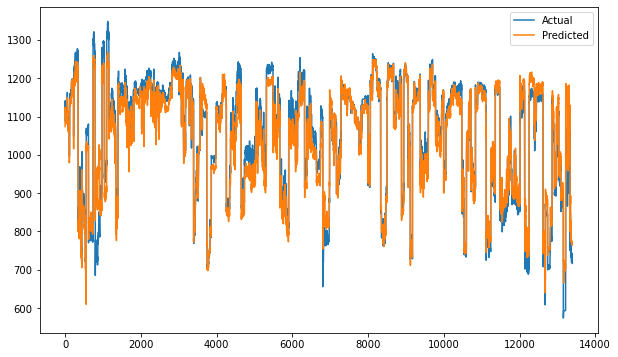

In [36]:
# Generate predictions on the test set
y_pred = new_model.predict(X_test)

# Calculate the number of time steps per sample
time_steps_per_sample = y_pred.shape[1]

# Reshape y_test and y_pred for comparison
y_test_flattened = np.repeat(y_test.values, time_steps_per_sample)
y_pred_flattened = y_pred.reshape(-1)

# Calculate the mean squared error of the predictions
mse = np.mean((y_test_flattened - y_pred_flattened)**2)
print('Mean Squared Error on Test Set:', mse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened, label='Actual')
plt.plot(y_pred_flattened, label='Predicted')
plt.legend()
plt.show()

In [37]:
import math

rmse = math.sqrt(mse)
print('Root Mean Squared Error on Test Set:', rmse)

Root Mean Squared Error on Test Set: 34.96723907920203


### Saving/Loading the model

In [49]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('TG_A.h5')

In [35]:
from tensorflow.keras.models import load_model

# Recreate the exact same model, including its weights and the optimizer
new_model = load_model('TG_A.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10400     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
